In [ ]:
#Understanding the Bayes Theorem

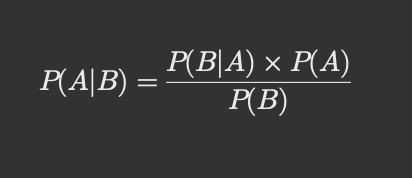

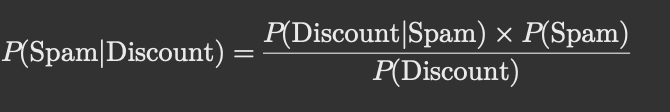

P(Spam)=0.3

P(Discount) = P(Discount | Spam) * P(-Spam) + P(Discount |- Spam)* P(-Spam)

P(Discount) = (0.4 * 0.3) + (0.1 * 0.7)=0.19

P(Spam | Discount) = 0.12/0.19 = 0.63



In [ ]:
# Given probabilities
P_spam = 0.3  # Prior probability of spam
P_not_spam = 0.7  # Prior probability of non-spam
P_discount_given_spam = 0.4  # Probability of "discount" given spam
P_discount_given_not_spam = 0.1  # Probability of "discount" given non-spam

# Step 1: Compute the total probability of "discount"
P_discount = (P_discount_given_spam * P_spam) + (P_discount_given_not_spam * P_not_spam)

# Step 2: Apply Bayes' Theorem
P_spam_given_discount = (P_discount_given_spam * P_spam) / P_discount

# Print the result
print(f"Probability of an email being spam given it contains 'discount': {P_spam_given_discount:.2f}")

Probability of an email being spam given it contains 'discount': 0.63


In [ ]:
#Using Naïve Bayes
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
# Generate a random dataset
np.random.seed(42)
spam_keywords = ["win", "free", "discount", "offer", "prize", "cash", "urgent", "limited", "click", "subscribe"]
non_spam_keywords = ["meeting", "schedule", "project", "team", "update", "invoice", "report", "discussion", "appointment", "deadline"]


In [ ]:
def generate_email(is_spam):
    words = np.random.choice(spam_keywords if is_spam else non_spam_keywords, size=np.random.randint(4, 8))
    return " ".join(words)

In [ ]:
num_samples = 1000  # Number of emails
data = {
    "email": [generate_email(np.random.rand() > 0.5) for _ in range(num_samples)],
    "label": [1 if np.random.rand() > 0.5 else 0 for _ in range(num_samples)]
}

df = pd.DataFrame(data)

In [ ]:
# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["email"])
y = df["label"]

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train the Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.52


In [ ]:
# Predict a new email
new_email = ["Exclusive discount for loyal customers"]
new_email_transformed = vectorizer.transform(new_email)
prediction = nb_model.predict(new_email_transformed)

In [ ]:
# Output result
print("Spam" if prediction[0] == 1 else "Not Spam")

Spam


In [ ]:
# Given probabilities
P_disease = 0.01  # Probability of having the disease
P_no_disease = 1 - P_disease  # Probability of not having the disease
P_positive_given_disease = 0.9  # Sensitivity (True Positive Rate)
P_positive_given_no_disease = 0.05  # False Positive Rate

# Compute total probability of testing positive
P_positive = (P_positive_given_disease * P_disease) + (P_positive_given_no_disease * P_no_disease)

# Apply Bayes' Theorem
P_disease_given_positive = (P_positive_given_disease * P_disease) / P_positive

# Print result
print(f"Probability of having the disease given a positive test result: {P_disease_given_positive:.4f}")

Probability of having the disease given a positive test result: 0.1538


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "diabetes.csv"  # Path to your uploaded file
df = pd.read_csv(file_path)

# Display first few rows to verify
print(df.head())

# Step 1: Compute prior probabilities
P_diabetes = df["Outcome"].mean()  # P(Diabetes)
P_no_diabetes = 1 - P_diabetes     # P(No Diabetes)

print(f"Prior Probability of Diabetes: {P_diabetes:.2f}")
print(f"Prior Probability of No Diabetes: {P_no_diabetes:.2f}")

# Step 2: Choose a test (Glucose Level > 120 as positive test)
threshold = 120
positive_test = df["Glucose"] > threshold

# Compute likelihoods
P_test_given_diabetes = df[positive_test & (df["Outcome"] == 1)].shape[0] / df[df["Outcome"] == 1].shape[0]
P_test_given_no_diabetes = df[positive_test & (df["Outcome"] == 0)].shape[0] / df[df["Outcome"] == 0].shape[0]

# Compute total probability of positive test (Law of Total Probability)
P_test = (P_test_given_diabetes * P_diabetes) + (P_test_given_no_diabetes * P_no_diabetes)

# Step 3: Apply Bayes’ Theorem
P_diabetes_given_test = (P_test_given_diabetes * P_diabetes) / P_test

print(f"Likelihood of Positive Test given Diabetes: {P_test_given_diabetes:.2f}")
print(f"Likelihood of Positive Test given No Diabetes: {P_test_given_no_diabetes:.2f}")
print(f"Total Probability of Positive Test: {P_test:.2f}")
print(f"Probability of Having Diabetes given Positive Test: {P_diabetes_given_test:.2f}")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Prior Probability of Diabetes: 0.35
Prior Probability of No Diabetes: 0.65
Likelihood of Positive Test given Diabetes: 0.73
Likelihood of Positive Test given No Diabetes: 0.31
Total Probability of Positive Test: 0.45
Probability of Having Diabetes given Positive Test: 0.56


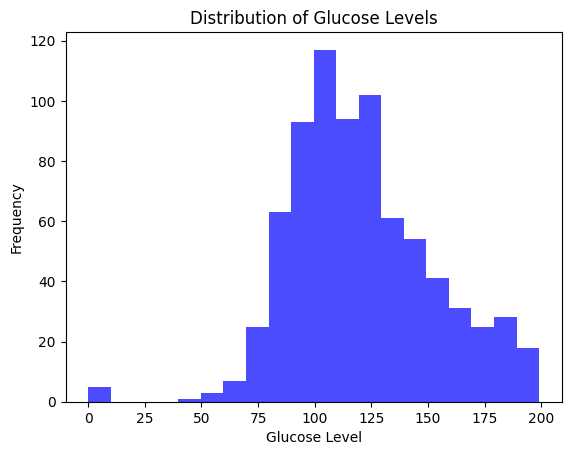

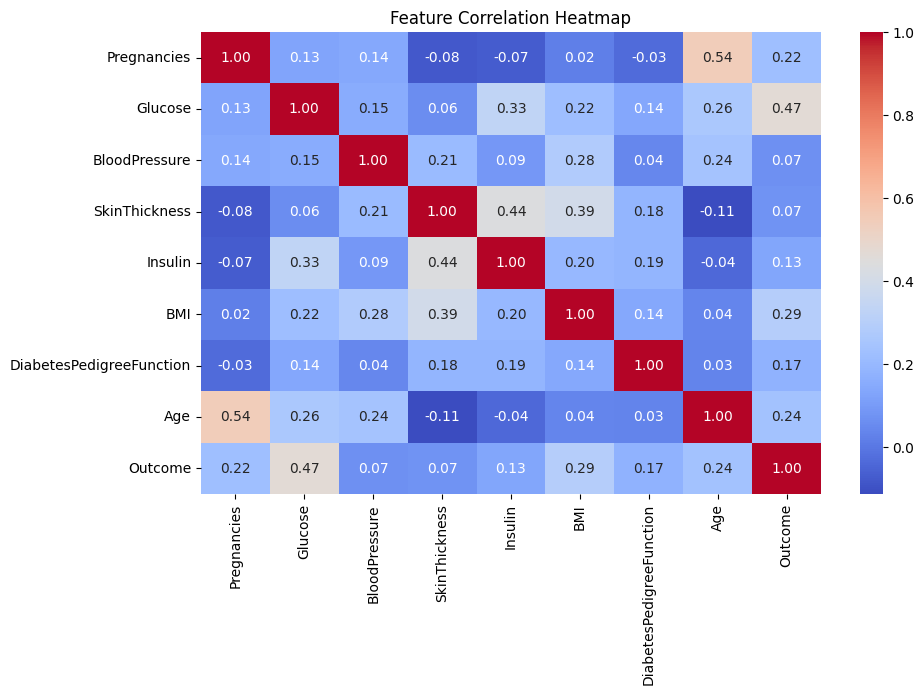

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for glucose levels
plt.hist(df["Glucose"], bins=20, color='blue', alpha=0.7)
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.title("Distribution of Glucose Levels")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()